In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import os

# Đường dẫn đến tập dữ liệu
data_path = "/content/drive/MyDrive/Colab Notebooks/DataMoto"
categories = ["xe_may", "xe_tai"]

# Chuẩn bị dữ liệu
img_size = 128  # Kích thước của hình ảnh đầu vào
data = []
labels = []

for category in categories:
    path = os.path.join(data_path, category)
    label = categories.index(category)
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh màu xám
            resized_image = cv2.resize(image, (img_size, img_size))
            data.append(resized_image)
            labels.append(label)
        except Exception as e:
            print(f"Error reading image {img_name}: {e}")

data = np.array(data) / 255.0  # Chuẩn hóa
data = np.expand_dims(data, axis=-1)  # Thêm chiều cho kênh
labels = np.array(labels)


In [ ]:
# Tách tập huấn luyện và kiểm thử
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Xây dựng mô hình
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 lớp cho man/woman
])

In [ ]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Huấn luyện mô hình
model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6867 - accuracy: 0.5263 - val_loss: 0.9392 - val_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 1s 586ms/step - loss: 0.7320 - accuracy: 0.5263 - val_loss: 0.5569 - val_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 1s 543ms/step - loss: 0.7335 - accuracy: 0.4737 - val_loss: 0.5650 - val_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 1s 592ms/step - loss: 0.6787 - accuracy: 0.4211 - val_loss: 0.6960 - val_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 1s 587ms/step - loss: 0.5870 - accuracy: 0.7895 - val_loss: 0.6748 - val_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 1s 732ms/step - loss: 0.5354 - accuracy: 0.7368 - val_loss: 0.5466 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 616ms/step - loss: 0.5194 - accuracy: 0.8421 - val_loss: 0.4574 - val_accuracy: 0.8000
Epoch 8/10
1/1 [=======

In [ ]:
# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2%}")

1/1 [==============================] - 0s 60ms/step - loss: 0.2543 - accuracy: 1.0000
Test accuracy: 100.00%


In [ ]:
import matplotlib.pyplot as plt

# Giả sử bạn đã huấn luyện mô hình và có các lịch sử sau đây
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1/1 [==============================] - 1s 738ms/step - loss: 0.2125 - accuracy: 0.9474 - val_loss: 0.1579 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 601ms/step - loss: 0.1386 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 550ms/step - loss: 0.0833 - accuracy: 1.0000 - val_loss: 0.2628 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 570ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.5048 - val_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 1s 553ms/step - loss: 0.1049 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 583ms/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 590ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 8/10
1/1 [====

In [ ]:
# Lấy thông tin về tổn thất và độ chính xác trong quá trình huấn luyện
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

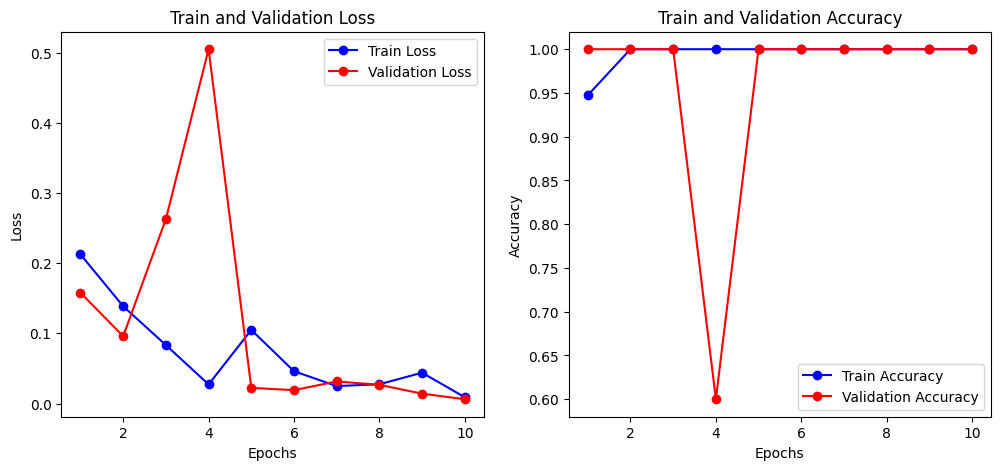

In [ ]:
# Biểu đồ tổn thất
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, phần 1
plt.plot(epochs, train_loss, 'bo-', label='Train Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ độ chính xác
plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, phần 2
plt.plot(epochs, train_accuracy, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:

# Đọc hình ảnh muốn dự đoán
image_path_xe_may = "/content/drive/MyDrive/Colab Notebooks/DataMoto/xe_may/40.jpg"  # Đường dẫn đến ảnh
image_path_xe_tai = "/content/drive/MyDrive/Colab Notebooks/DataMoto/xe_tai/32.jpg"  # Đường dẫn đến ảnh

# Đọc ảnh và chuẩn hóa
def prepare_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh màu xám
    image_resized = cv2.resize(image, (img_size, img_size))  # Thay đổi kích thước
    image_normalized = image_resized / 255.0  # Chuẩn hóa
    image_normalized = np.expand_dims(image_normalized, axis=-1)  # Thêm chiều kênh
    return image, np.expand_dims(image_normalized, axis=0)  # Thêm chiều batch

# Chuẩn bị hình ảnh
image_xe_may, image_xe_may_prepared = prepare_image(image_path_xe_may)
image_xe_tai, image_xe_tai_prepared = prepare_image(image_path_xe_tai)


In [ ]:
# Dự đoán
prediction_xe_may = model.predict(image_xe_may_prepared)
prediction_xe_tai = model.predict(image_xe_tai_prepared)

predicted_label_xe_may = np.argmax(prediction_xe_may, axis=1)  # Nhận chỉ số của lớp có xác suất cao nhất
predicted_label_xe_tai = np.argmax(prediction_xe_tai, axis=1)

predicted_category_xe_may = categories[predicted_label_xe_may[0]]  # Lấy nhãn tương ứng
predicted_category_xe_tai = categories[predicted_label_xe_tai[0]]

1/1 [==============================] - 0s 33ms/step


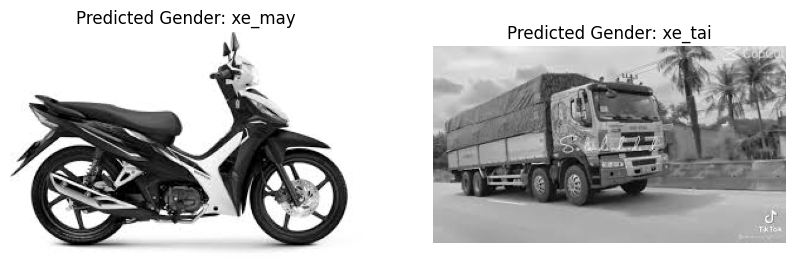

In [ ]:
# Hiển thị 2 hình ảnh và kết quả dự đoán của chúng
plt.figure(figsize=(10, 5))

# Biểu đồ con 1: Ảnh xe may với dự đoán
plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, phần 1
plt.imshow(image_xe_may, cmap='gray')  # Hiển thị hình ảnh xe may
plt.title(f"Predicted Gender: {predicted_category_xe_may}")  # Kết quả dự đoán
plt.axis("off")  # Ẩn trục

# Biểu đồ con 2: Ảnh xe tai với dự đoán
plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, phần 2
plt.imshow(image_xe_tai, cmap='gray')  # Hiển thị hình ảnh xe may
plt.title(f"Predicted Gender: {predicted_category_xe_tai}")  # Kết quả dự đoán
plt.axis("off")

# Hiển thị biểu đồ với 2 phần
plt.show()